# Fashion MNIST

# Dupa descarcarea setului de date vedem ca este codat in forma ubyte
         Folosim apoi urmatoarea functie pentru a citi datele si a le returna ca un tablou numpy

In [34]:
import struct
import numpy as np

def read_idx(filename):
    """Credit: https://gist.github.com/tylerneylon""" 
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)

# Folosim functia pentru a extrage baza de date pentru instruire si testare

In [35]:
x_train = read_idx("c:/Users/Harum/Documents/13/dataset/train-images-idx3-ubyte")
y_train = read_idx("c:/Users/Harum/Documents/13/dataset/train-labels-idx1-ubyte")
x_test = read_idx("c:/Users/Harum/Documents/13/dataset/t10k-images-idx3-ubyte")
y_test = read_idx("c:/Users/Harum/Documents/13/dataset/t10k-labels-idx1-ubyte")

# Inspecare baza de date


In [36]:
# printing the number of samples in x_train, x_test, y_train, y_test
print("Initial shape or dimensions of x_train", str(x_train.shape))

print ("Number of samples in our training data: " + str(len(x_train)))
print ("Number of labels in our training data: " + str(len(y_train)))
print ("Number of samples in our test data: " + str(len(x_test)))
print ("Number of labels in our test data: " + str(len(y_test)))
print()
print ("Dimensions of x_train:" + str(x_train[0].shape))
print ("Labels in x_train:" + str(y_train.shape))
print()
print ("Dimensions of x_test:" + str(x_test[0].shape))
print ("Labels in y_test:" + str(y_test.shape))

Initial shape or dimensions of x_train (60000, 28, 28)
Number of samples in our training data: 60000
Number of labels in our training data: 60000
Number of samples in our test data: 10000
Number of labels in our test data: 10000

Dimensions of x_train:(28, 28)
Labels in x_train:(60000,)

Dimensions of x_test:(28, 28)
Labels in y_test:(10000,)


# Vizualizați câteva exemple de imagini

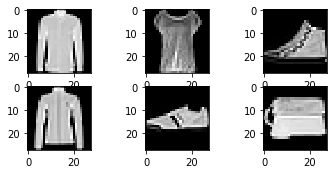

In [37]:
import matplotlib.pyplot as plt

#plot 6 imagini, note subplot argument sunt nrows,ncols, index
#setam cloare map pe culorea gri deoarece setul de date al imagini este la scara gri 
plt.subplot(331)
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(332)
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(333)
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(334)
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(335)
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(336)
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

#Afisare plots
plt.show()


In [38]:
import keras
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras import backend as k

#parametri de instruire
batch_size = 128
epochs = 10

#Stocare numerlor in randuri si coloane
img_rows = x_train[0].shape[0]
img_cols = x_train[1].shape[0]

#formateaza setul de date intro forma necesara lui keras
#ne trebuie sa adugam a 4 dimensiun catre baza de date shimband 
#forma originala a imagini de la (60000,28,28) catre (60000,28,28,1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

#Stocare formei/shape unei singure imagini
input_shape = (img_rows, img_cols, 1)

#schimbarea tipului de  imagine in float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#Normalizarea si schimbarea range de  la (0-255)la (0-1)
x_train /=255
x_test /=255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

#one hot encode output
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# Let's count the number columns in our hot encoded matrix 
print ("Number of Classes: " + str(y_test.shape[1]))


num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

#create model
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=input_shape))
model.add(BatchNormalization())

model.add(Conv2D(64,(3,3), activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

#complie
model.compile(keras.optimizers.Adadelta(), 'categorical_crossentropy', ['accuracy'])

print(model.summary())

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Number of Classes: 10
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_19 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_20 (Batc (None, 24, 24, 64)        256       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 12, 12, 64)        0         
_________________________

# Instruire modelului

In [39]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test)

)

#Evaluarea performantei modelului
score = model.evaluate(x_test, y_test,verbose=0)
print('Test loss: ', score[0])
print("Test accuracy: ", score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 15s 244us/step - loss: 0.4436 - accuracy: 0.8473 - val_loss: 2.0415 - val_accuracy: 0.4554
Epoch 2/10
60000/60000 [==============================] - 13s 221us/step - loss: 0.2790 - accuracy: 0.9021 - val_loss: 0.2515 - val_accuracy: 0.9083
Epoch 3/10
60000/60000 [==============================] - 13s 223us/step - loss: 0.2361 - accuracy: 0.9160 - val_loss: 0.2419 - val_accuracy: 0.9138
Epoch 4/10
60000/60000 [==============================] - 13s 224us/step - loss: 0.2065 - accuracy: 0.9258 - val_loss: 0.2620 - val_accuracy: 0.9083
Epoch 5/10
60000/60000 [==============================] - 13s 224us/step - loss: 0.1884 - accuracy: 0.9322 - val_loss: 0.2451 - val_accuracy: 0.9131
Epoch 6/10
60000/60000 [==============================] - 14s 225us/step - loss: 0.1688 - accuracy: 0.9395 - val_loss: 0.2133 - val_accuracy: 0.9273
Epoch 7/10
60000/60000 [==============================] 

# Testam modelul

In [40]:
import cv2
import numpy as np

def getLabel(input_class):
    number = int(input_class)
    if number == 0:
        return 'T-shirt/top'
    if number == 1:
        return 'Trouser'
    if number == 2:
        return 'Pullover'
    if number == 3:
        return "Dress"
    if number == 4:
        return "Coat"
    if number == 5:
        return "Sandal"
    if number == 6:
        return "Shirt"
    if number == 7:
        return "Sneaker"
    if number == 8:
        return "Bag"
    if number == 9:
        return "Ankle boot"

def draw_test(name, pred, actual, input_im):
    BLACK =[0, 0, 0]

    res = getLabel(pred)
    actual = getLabel(actual)
    expanded_image = cv2.copyMakeBorder(input_im, 0,0,0, 4*imageL.shape[0], cv2.BORDER_CONSTANT, value=BLACK)
    expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, "Predicted -" +str(res), (152, 70), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0), 1)
    cv2.putText(expanded_image, "Actual - " + str(actual), (152, 90), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,0,255), 1)
    cv2.imshow(name, expanded_image)

for i in range(0,10):
    rand = np.random.randint(0, len(x_test))
    input_im = x_test[rand]
    actual = y_test[rand].argmax(axis=0)
    imageL = cv2.resize(input_im, None, fx=4, fy=4, interpolation=cv2.INTER_CUBIC)
    input_im = input_im.reshape(1, 28,28, 1)

    #Predictia
    res = str(model.predict_classes(input_im, 1, verbose=0)[0])
    draw_test("Prediction", res, actual, imageL)
    cv2.waitKey(0)

cv2.destroyAllWindows()    

# R

# E